In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
pd.pandas.set_option('display.max_columns',None)

#### Function for importing dataset : 

In [2]:
## Column names : 
columns = {0:'engineNumber',1:'cycleNumber',2:'opSetting1',3:'opSetting2',4:'opSetting3',5:'sensor1',6:'sensor2',
           7:'sensor3',8:'sensor4',9:'sensor5',10:'sensor6',11:'sensor7',12:'sensor8',13:'sensor9',14:'sensor10',
           15:'sensor11',16:'sensor12',17:'sensor13',18:'sensor14',19:'sensor15',20:'sensor16',
           21:'sensor17',22:'sensor18',23:'sensor19',24:'sensor20',25:'sensor21'}

def getting_df(file_no, columns): 
    df_train = pd.read_csv(f"dataset/train_FD00{file_no}.txt" , sep=' ' , header=None).drop(columns=[26,27])
    df_test = pd.read_csv(f"dataset/test_FD00{file_no}.txt" , sep=' ' , header=None).drop(columns=[26,27])
    df_RUL = pd.read_csv(f"dataset/RUL_FD00{file_no}.txt" , sep=' ' , header=None).drop(columns=[1])

    ## Adding column names : 
    df_train = df_train.rename(columns=columns)
    df_test = df_test.rename(columns=columns)
    df_RUL = df_RUL.rename(columns={0:'RUL'})
    return df_train , df_test , df_RUL 


In [75]:
df_train1 , df_test1 , df_RUL1 = getting_df(file_no=1 , columns=columns)
df_train1.head()

,engineNumber,cycleNumber,opSetting1,opSetting2,opSetting3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


#### Exploring The Data :    

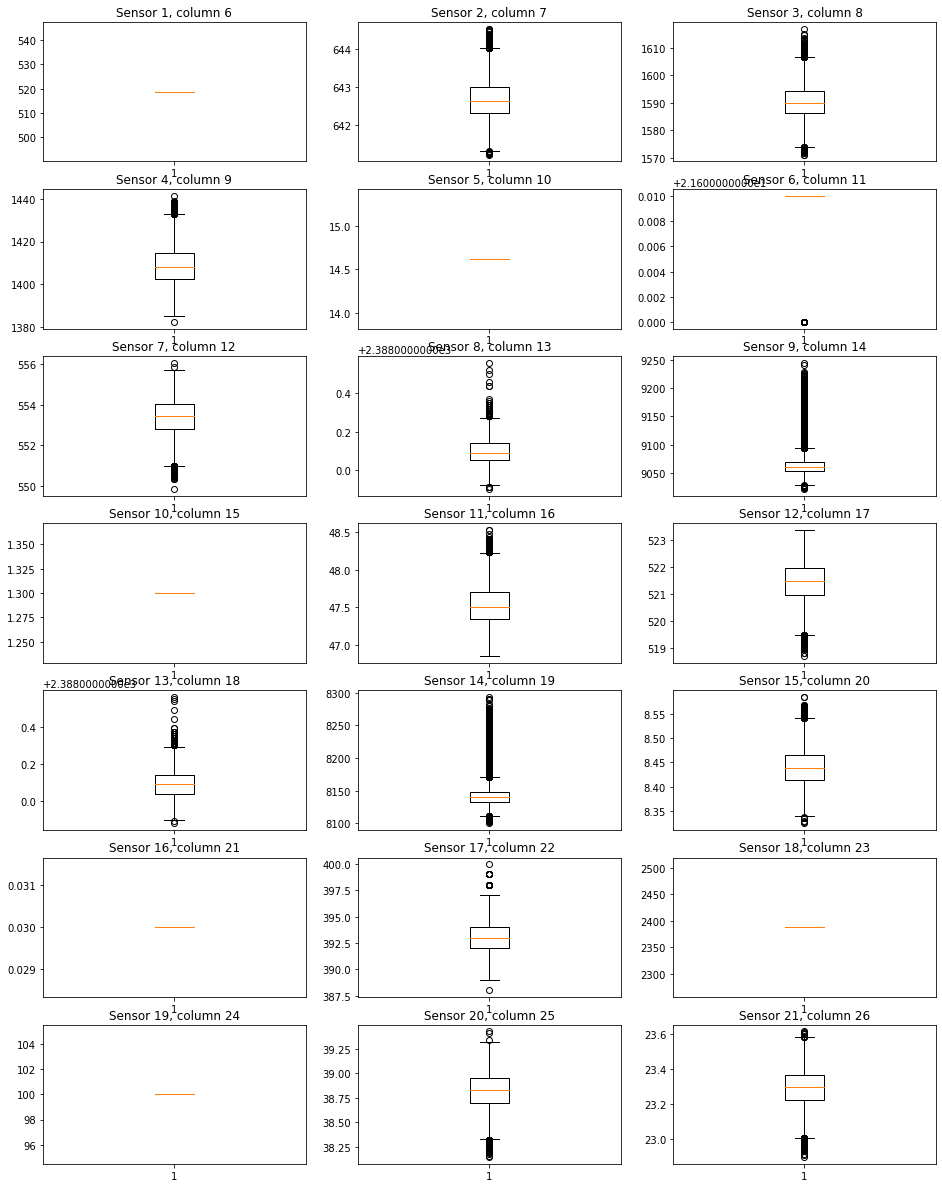

In [76]:
plt.figure(figsize = (16, 21))

for i in range(21):
    temp_data = df_train1.iloc[:,i+5]
    plt.subplot(7,3,i+1)
    plt.boxplot(temp_data)
    plt.title("Sensor " + str(i+1) + ", column "+ str(i+6))
plt.show()

From the above plot we see that columns 6, 10, 11, 15, 21, 23 and 24 contain constant values

- These columns corresponds to sensors 1, 5, 6, 10, 16, 18 and 19
- Useful sensors are therefore 2, 3, 4, 7, 8, 9, 11, 12 ,13 ,14 ,15 ,17, 20, 21

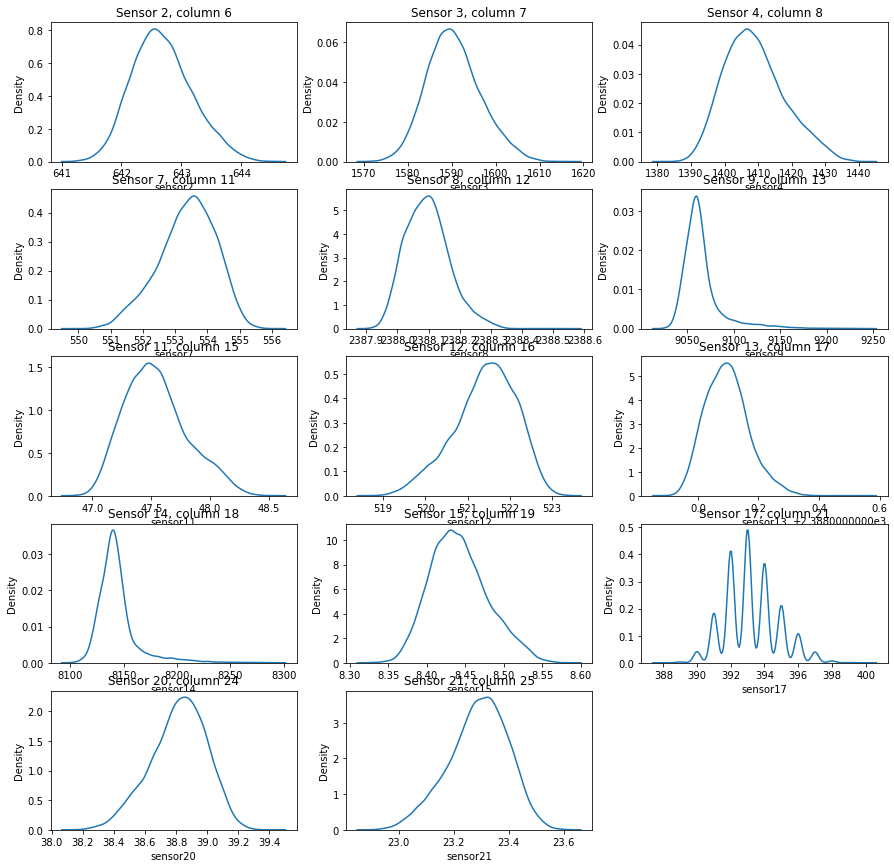

In [77]:
### KDE plot : 
plt.figure(figsize = (15, 21))
for i,j in enumerate([6, 7, 8, 11, 12, 13, 15, 16, 17, 18, 19, 21, 24, 25]):
    temp = df_train1.iloc[:, j]
    plt.subplot(7,3, i+1)
    sns.kdeplot(temp, legend = False)
    plt.title("Sensor " + str(j-4) + ", column "+ str(j))
plt.show()

An algorithm generalizes well (i.e., its performance on unseen data is good) if unseen data is similar in distribution to training data. Unseen data need not be exactly of same distribution as of training data but it should not be very different from training data.

So let's compare the distribution of training and test data:

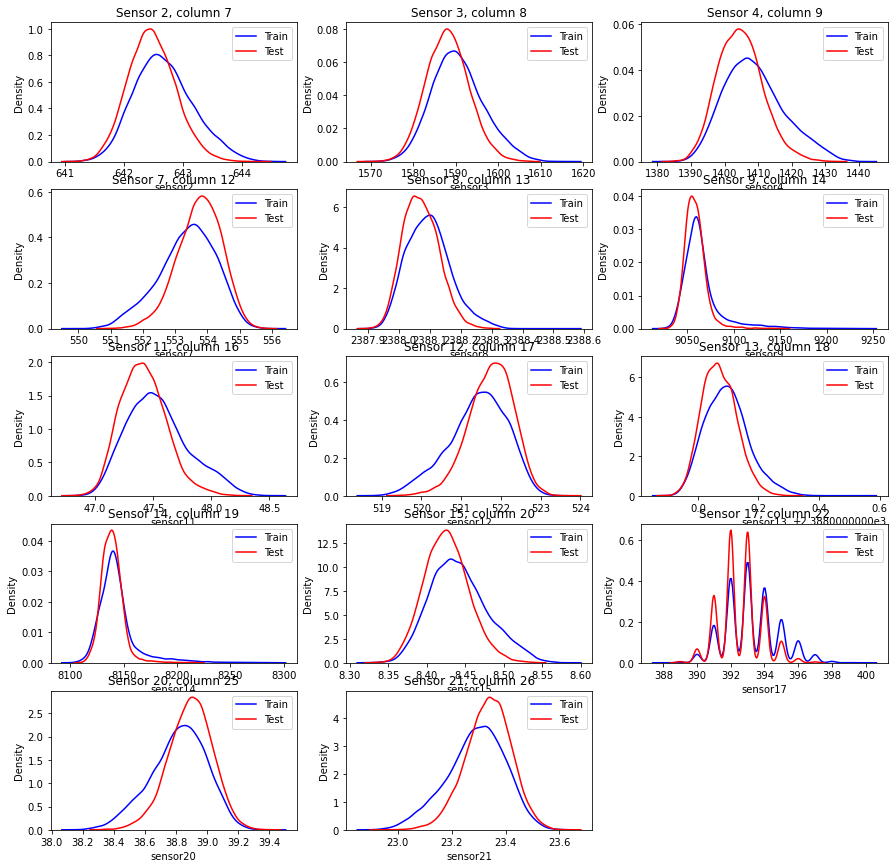

In [78]:
## Comparision of train and test Dataset : 
plt.figure(figsize = (15, 21))
for i,j in enumerate([6, 7, 8, 11, 12, 13, 15, 16, 17, 18, 19, 21, 24, 25]):
    temp_train = df_train1.iloc[:, j]
    temp_test = df_test1.iloc[:, j]
    plt.subplot(7,3, i+1)
    sns.kdeplot(temp_train, legend = False, color = "blue", label = "Train")
    sns.kdeplot(temp_test, legend = False, color = "red", label = "Test")
    plt.title("Sensor " + str(j-4) + ", column "+ str(j+1))
    plt.legend()
plt.show()

In [3]:
columns_to_keep = ['cycleNumber', 'sensor2', 'sensor3', 'sensor4', 'sensor7', 'sensor8', 'sensor9',
                   'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15',
                   'sensor17', 'sensor20', 'sensor21']

columns_to_drop=['opSetting1', 'opSetting2', 'opSetting3',
                 'sensor1','sensor5','sensor6','sensor10','sensor16','sensor18', 'sensor19']

### Preproccesing the Data

In [4]:
def dropping_col(columns_to_drop , df): 
    df  = df.drop(columns=columns_to_drop)
    return df 

In [81]:
## Dropping unwanted Columns : 
df_train1 = dropping_col(columns_to_drop=columns_to_drop,df = df_train1)
df_train1

,engineNumber,cycleNumber,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
0,1,1,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,1,2,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,1,3,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,1,4,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,1,5,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735
20627,100,197,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594
20628,100,198,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333
20629,100,199,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640


In [82]:
df_test1 = dropping_col(columns_to_drop=columns_to_drop , df=df_test1)
df_test1

,engineNumber,cycleNumber,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
0,1,1,643.02,1585.29,1398.21,553.90,2388.04,9050.17,47.20,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735
1,1,2,641.71,1588.45,1395.42,554.85,2388.01,9054.42,47.50,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916
2,1,3,642.46,1586.94,1401.34,554.11,2388.05,9056.96,47.50,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166
3,1,4,642.44,1584.12,1406.42,554.07,2388.03,9045.29,47.28,521.38,2388.05,8132.90,8.3917,391,39.00,23.3737
4,1,5,642.51,1587.19,1401.92,554.16,2388.01,9044.55,47.31,522.15,2388.03,8129.54,8.4031,390,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,643.24,1599.45,1415.79,553.41,2388.02,9142.37,47.69,520.69,2388.00,8213.28,8.4715,394,38.65,23.1974
13092,100,195,643.22,1595.69,1422.05,553.22,2388.05,9140.68,47.60,521.05,2388.09,8210.85,8.4512,395,38.57,23.2771
13093,100,196,643.44,1593.15,1406.82,553.04,2388.11,9146.81,47.57,521.18,2388.04,8217.24,8.4569,395,38.62,23.2051
13094,100,197,643.26,1594.99,1419.36,553.37,2388.07,9148.85,47.61,521.33,2388.08,8220.48,8.4711,395,38.66,23.2699


In [83]:
df_RUL1

,RUL
0,112
1,98
2,69
3,82
4,91
...,...
95,137
96,82
97,59
98,117


In [5]:
## Creating function for adding  RUL in  train dataset : 
def adding_RUL_col_train(df_train): 
    data = df_train.copy()
    cycle_to_failure = data.groupby('engineNumber')['cycleNumber'].max()
    d1 = dict(cycle_to_failure) 
    list1 = []
    for i in range(data.shape[0]): 
        list1.append(cycle_to_failure[data['engineNumber'][i]] - data['cycleNumber'][i])
    data['RUL'] = list1
    return data


In [6]:
## Creating function for adding  RUL in  test dataset : 
def adding_RUL_col_test(df_test , df_RUL): 
    data = df_test.copy()
    cycle_to_failure = (data.groupby('engineNumber')["cycleNumber"].max()  + np.array(df_RUL['RUL']))
    d1 = dict(cycle_to_failure) 
    list1 = []
    for i in range(data.shape[0]): 
        list1.append(cycle_to_failure[data['engineNumber'][i]] - data['cycleNumber'][i])
    data['RUL'] = list1
    return data

In [90]:
df_test1 = adding_RUL_col_test(df_test=df_test1 , df_RUL=df_RUL1)

#### Saving proccesed Data into CSV : 

In [221]:
### Function for saving files into CSV : 
def saving_to_csv(df , file_no , file_type): 
    import os 
    os.makedirs("Proccessed_data" , exist_ok=True)
    df.to_csv(f"Proccessed_data/{file_type}_FD00{file_no}.csv")
    
## Columns need to add and drop : 
columns = {0:'engineNumber',1:'cycleNumber',2:'opSetting1',3:'opSetting2',4:'opSetting3',5:'sensor1',6:'sensor2',
           7:'sensor3',8:'sensor4',9:'sensor5',10:'sensor6',11:'sensor7',12:'sensor8',13:'sensor9',14:'sensor10',
           15:'sensor11',16:'sensor12',17:'sensor13',18:'sensor14',19:'sensor15',20:'sensor16',
           21:'sensor17',22:'sensor18',23:'sensor19',24:'sensor20',25:'sensor21'}

columns_to_drop=['opSetting1', 'opSetting2', 'opSetting3',
                 'sensor1','sensor5','sensor6','sensor10','sensor16','sensor18', 'sensor19']

### proccesing and saving files : 
for i in range(1,5): 
    ## Reading Files : 
    df_train , df_test , df_RUL = getting_df(file_no=i , columns=columns)
    
    ## Deleting Unwanted Columns : 
    df_train = dropping_col(columns_to_drop=columns_to_drop , df=df_train)
    df_test = dropping_col(columns_to_drop=columns_to_drop , df=df_test)
    
    ## Adding RUL columns : 
    df_train = adding_RUL_col_train(df_train=df_train)
    df_test = adding_RUL_col_test(df_test=df_test,df_RUL=df_RUL)
    
    ## Saving Files : 
    saving_to_csv(df=df_train , file_no=i , file_type='train')
    saving_to_csv(df=df_test , file_no=i , file_type='test')

##### Training and Prediction : 

In [191]:
## Training data : 
df1 = pd.read_csv('Proccessed_data/train_FD001.csv',index_col=False).drop(columns=['Unnamed: 0'])
df2 = pd.read_csv('Proccessed_data/train_FD002.csv',index_col=False).drop(columns=['Unnamed: 0'])
df3 = pd.read_csv('Proccessed_data/train_FD003.csv',index_col=False).drop(columns=['Unnamed: 0'])
df4 = pd.read_csv('Proccessed_data/train_FD004.csv',index_col=False).drop(columns=['Unnamed: 0'])

In [192]:
## FD001 : 
x_train1 ,y_train1 = df1.drop(columns=['RUL']) , df1['RUL']
df1_test = pd.read_csv('Proccessed_data/test_FD001.csv',index_col=False).drop(columns=['Unnamed: 0'])

In [193]:
x_test1 ,y_test1 = df1_test.drop(columns=['RUL']) , df1_test['RUL']

In [199]:
## Clipping y_train1 at 125 ..making upper bound constant 
y_train1_clipped = y_train1

In [200]:
### Scaling : 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train1_scaled = scaler.fit_transform(x_train1)
x_test1_scaled = scaler.transform(x_test1)

In [201]:
## Feature Engineering : 
from sklearn.preprocessing import PolynomialFeatures 
poly = PolynomialFeatures(2)
x_train1_final = poly.fit_transform(x_train1_scaled)
x_test1_final = poly.fit_transform(x_test1_scaled)

In [202]:
x_train1_final.shape

(20631, 153)

In [203]:
## Training SVR model : 
from sklearn.svm import SVR 
svr = SVR(kernel='linear')
svr.fit(x_train1_final ,y_train1_clipped)
print("Accuracy : " ,svr.score(x_test1_final ,y_test1))

Accuracy :  0.6508304427136101


In [204]:
# Feature engineering + selection
from sklearn.feature_selection import SelectFromModel
select_features = SelectFromModel(svr, threshold='mean', prefit=True)
select_features.get_support()
feature_names = poly.get_feature_names()

print('Original features:\n', x_train1.columns)
print('Best features:\n', np.array(feature_names)[select_features.get_support()])
np.array(feature_names)[select_features.get_support()].shape


Original features:
 Index(['engineNumber', 'cycleNumber', 'sensor2', 'sensor3', 'sensor4',
       'sensor7', 'sensor8', 'sensor9', 'sensor11', 'sensor12', 'sensor13',
       'sensor14', 'sensor15', 'sensor17', 'sensor20', 'sensor21'],
      dtype='object')
Best features:
 ['x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x9' 'x10' 'x11' 'x12' 'x15'
 'x1^2' 'x1 x5' 'x1 x6' 'x1 x7' 'x1 x9' 'x1 x12' 'x1 x14' 'x3 x9' 'x4 x7'
 'x4 x11' 'x5 x7' 'x5 x9' 'x7 x12' 'x7 x15' 'x8 x10' 'x8 x11' 'x8 x14'
 'x10 x11' 'x10 x15' 'x11 x12' 'x11 x15']


F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(35,)

In [205]:
x_train1_final = x_train1_final[:,select_features.get_support()]
x_test1_final = x_test1_final[:,select_features.get_support()]

In [206]:
x_train1_final.shape

(20631, 35)

In [207]:
## Training Linear Model : 
from sklearn.linear_model import LinearRegression 
linear = LinearRegression()
linear.fit(x_train1_final,y_train1_clipped) 
print("Accuracy : ",linear.score(x_test1_final,y_test1))

Accuracy :  0.5783834423087397


In [58]:
## Training SVR model : 
from sklearn.svm import SVR 
svr = SVR(kernel='linear')
svr.fit(x_train1_final ,y_train1_clipped)
print("Accuracy : " ,svr.score(x_test1_final ,y_test1))

Accuracy :  0.6393833187532255


In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVR
from sklearn.base import BaseEstimator,TransformerMixin

In [129]:

class CustomDataTransformer(BaseEstimator, TransformerMixin): 
    
    def __init__(self,model_obj): 
        self.model_obj = model_obj  
    
    def fit(self,X,y=None):
        return self 
        
    def transform(self,X,y=None):
        select_features = SelectFromModel(self.model_obj, threshold='mean', prefit=True)
        select_features.get_support()
        feature_names = poly.get_feature_names()
        X_transformed = X[:,select_features.get_support()]
        return X_transformed  
    
        

In [170]:
pipeline = Pipeline(steps=[
    
    ('scaler' , StandardScaler())  , 
    ('polynomial' , PolynomialFeatures(2)) 
     
   
    ])

In [171]:
x_train = df1.drop(columns=['RUL'])
x_test = df1_test.drop(columns=['RUL'])


In [172]:
train_arr = pipeline.fit_transform(x_train)

In [173]:
train_arr .shape

(20631, 153)

In [174]:
test_arr = pipeline.fit_transform(x_test)

In [175]:
train_arr = train_arr[:,select_features.get_support()]

In [176]:
test_arr = test_arr[:,select_features.get_support()]

In [179]:
from sklearn.linear_model import LinearRegression 
linear = LinearRegression()
linear.fit(x_train1_final,y_train1_clipped) 
print("Accuracy : ",linear.score(x_test1_final,y_test1))

Accuracy :  0.6094003741279055
